###  Project of Mobile Game A/B Testing

Cookie Cats is a mobile puzzle game developed and published by Tactile Entertainment. The game focuses on five cats named Rita (pink), Smokey (red), Berry (blue), Ziggy (green), and Belle (yellow). The game was released on April 27, 2016. It is a classic "connect three" type puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features cats singing. We are not kidding!


### Table Of Contents
    
<ul> 
<li><a href="intro">Introduction 
    
<li><a href="Ques">Questions

<li><a href="Wrang">Data Wrangling
    
<li><a href="A_B">Exploratory_Data Analysis
    
<li><a href="A_B">A/B Testing    

<li><a href="Conclu">Conclusion

<h3 id="intro">Introduction

As players progress through the game, they will encounter portals that force them to wait for a while before they can progress or make an in-app purchase. In this project, we will analyze the result of A/B testing where the first portal in Cookie Cats has been moved from level 30 to level 40. In particular, we will analyze the impact on player retention.

<ul>
<li>userid - a unique number that identifies each player. 
<li>version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a <li>gate at level 40).
<li>retention_1 - did the player come back and play 1 day after installing?
<li>retention_7 - did the player come back and play 7 days after installing?

<h3>Import libraries.


**import libraries that can be useful and helpful in this project**

In [1]:
#import libraries that we will use in our project
# Importing needed Lib
import pandas as pd
import numpy as np
import random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from numpy.polynomial.polynomial import polyfit
random.seed(42)

C:\Users\Islam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Islam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


<h3 id="Wrang">Data Wrangling

let's divide data wrangling to three main factors **Gathering Data,assess and cleaning Data**

<h4>Gathering Data

In [2]:
#import our dataset -the file is csv so we will use read_csv to read our file
df=pd.read_csv("cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<h4>Assessing Data


at this section we dig into the data if they duplicated rows or missing value or rename columns

In [3]:
#show how many rows and columns in our dataset
df.shape

(90189, 5)

In [4]:
#look into if there's any missing value
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

**we notice that there are not any missing value**

In [5]:
#info regaring types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [6]:
# info about numerical types of our columns
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [7]:
# number of non-null unique values for each feature
df.nunique()


userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [8]:
# if there's any duplicated numbers 
df.duplicated().sum()

0

<h4>Data Cleaning


In [9]:
#rename some columns to be more clear and properly explained
df=df.rename(columns={"userid":"User_id"})


In [10]:
df.head(2)

,User_id,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False


<h3 id="eda">Exploratory_Data Analysis


<ul><li>Explore our dataset if there are any outliers or find out any value that we didn't detect when we do any numerical computation

In [11]:
df.head(2)

,User_id,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False


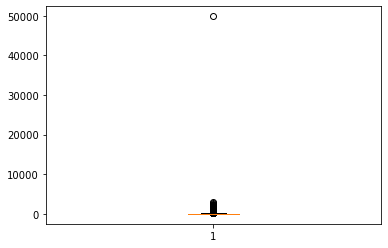

In [12]:
plt.boxplot(df["sum_gamerounds"]);

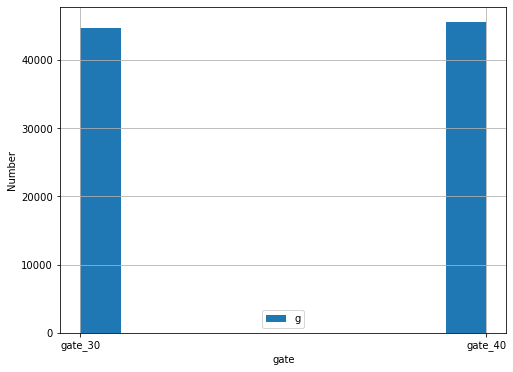

In [13]:
plt.figure(figsize=[8,6])
df["version"].hist()
plt.xlabel("gate")
plt.ylabel("Number")
plt.legend("gate")
plt.show()

Text(0.5, 0, '# Game rounds')

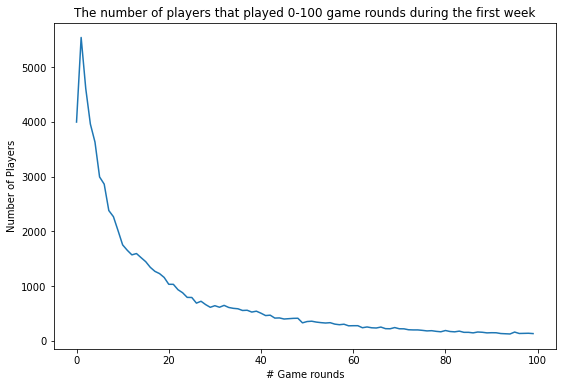

In [14]:
# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['User_id'].count()
plot_df
ax = plot_df[:100].plot(figsize=(9,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

The distribution is highly skewed, with a long tail on the right. A huge number of players played fewer than 20 rounds and left the game. For rounds greater than 60, the number of players stayed steady at about 300.



<AxesSubplot:>

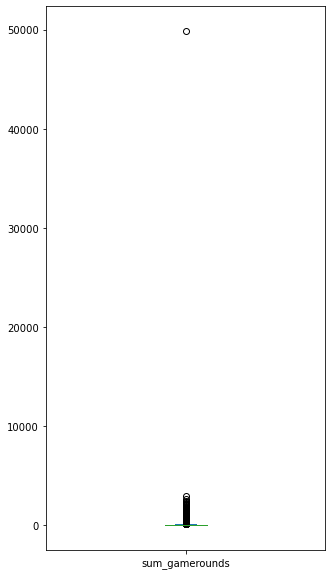

In [15]:
df['sum_gamerounds'].plot.box(figsize=(5,10))

In [16]:
df.groupby("version").agg(["mean","count"])

User_id        sum_gamerounds        retention_1         \
                 mean  count           mean  count        mean  count   
version                                                                 
gate_30  4.987564e+06  44700      52.456264  44700    0.448188  44700   
gate_40  5.009073e+06  45489      51.298776  45489    0.442283  45489   

        retention_7         
               mean  count  
version                     
gate_30    0.190201  44700  
gate_40    0.182000  45489

In [17]:
# A/B Groups & Target Summary Stats
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


<h3>A/B Testing    


<a id='ab_test'></a>

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as the gate is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither gate is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the gate 40 is better unless the gate 30 proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of 


A. *Null hypothesis: the conversion rate of the gate_40 is greater or the same than the conversion rate of the gate_30.
    $$H_0: {gate_4} - {gate_3} ≤ 0$$

B. Alternative hypothesis: the conversion rate of the gate_40 is less than the conversion rate of the 
    gate_30.$$H_1: {gate_4} - {gate_3} > 0$$

#### Day 1 Retention


In [18]:
df.head(2)

,User_id,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False


$$H_0: {gate_4} - {gate_3} ≤ 0$$


$$H_1: {gate_4} - {gate_3} > 0$$

c. What is $n_{gate30}$? and  What is $n_{gate40}$?

In [19]:
#shape of gate 30
gate_30=df[df["version"]=="gate_30"]
gate_40=df[df["version"]=="gate_40"]
n_30=gate_30.shape[0]
n_40=gate_40.shape[0]
n_30,n_40

(44700, 45489)

a. What is the **retention rate** for $p_{gate_30}$ under the null?  and a. What is the **retention rate** for $p_{gate_40}$ under the null? 

In [20]:
#mean of gate_30 and gate_40
m_30=gate_30[gate_30["version"]=="gate_30"]["retention_1"].mean()
m_40=gate_40[gate_40["version"]=="gate_40"]["retention_1"].mean()
m_30,m_40

(0.4481879194630872, 0.44228274967574577)

g. Find $p_{gate_40}$ - $p_{gate_30}$ for your simulated values from part (e) and (f).

In [21]:
#the different them
p_diff=m_40-m_30
p_diff

-0.005905169787341458

In [22]:
#statistics with numpy and repeat the operation 
gate_30_choice=np.random.choice([0,1],p=[1-m_30,m_30],size=[44700])
gate_40_choice=np.random.choice([0,1],p=[1-m_40,m_40],size=[45489])
gate_30_choice.mean(),gate_40_choice.mean()

(0.44865771812080535, 0.4404801160720174)

h. Simulate 10,000 $p_{gate_40}$ - $p_{gate_30}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **diff**.

The Bonferroni correction compensates for that increase by testing each individual hypothesis at a significance level of {\displaystyle \alpha /m}\alpha /m, where {\displaystyle \alpha }\alpha  is the desired overall alpha level and {\displaystyle m}m is the number of hypotheses.[4] For example, if a trial is testing {\displaystyle m=20}m=20 hypotheses with a desired {\displaystyle \alpha =0.05}\alpha = 0.05, then the Bonferroni correction would test each individual hypothesis at {\displaystyle \alpha =0.05/20=0.0025}{\displaystyle \alpha =0.05/20=0.0025}. Likewise, when constructing multiple

we used here 2 metrics so divive alpha twice .05/2 so alpha is .025

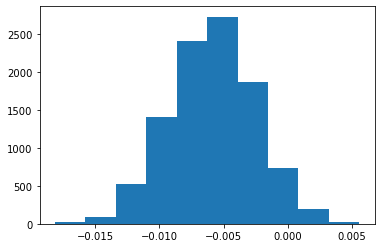

In [23]:
#for loop to do the reapeat
diff=[]
for _ in range(10000):
    gate_30_choice=np.random.choice([0,1],p=[1-m_30,m_30],size=[44700])
    gate_40_choice=np.random.choice([0,1],p=[1-m_40,m_40],size=[45489])
    diff.append(gate_40_choice.mean()-gate_30_choice.mean())
diff=np.array(diff)

#a histogram of the **diff**.  Does this plot look like what you expected?
plt.hist(diff);


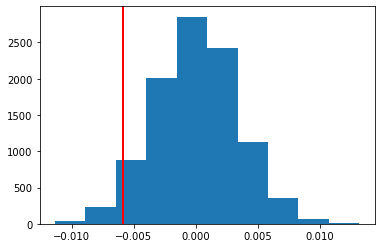

In [24]:
#will make normal shape under the null
p_null=np.random.normal(0,np.std(diff),10000)
plt.hist(p_null);
plt.axvline(p_diff,color="red",lw=2)

In [25]:
#calcualte p_value regarding alternative
(p_null > diff.mean()).mean()

0.9594

c-Our p-value is  exceeds the critical value of 0.025 in this case and so we shouldn't reject the null hypothesis, so we should stick with gate_30 and not move up to gate_40.Users in Gate30 have higher 1 day retention than Gate40

#### Day 7 Retention


**as we did previously at retention 
day 1 we repeat that  at retention day 1**

**Note** that when I create a variable, we put 7 means day 7 so it doesn't overlap with an another variable

a. What is the **retention rate** for $p_{gate_30}$ under the null?  and a. What is the **retention 7** for $p_{gate_40}$ under the null? 

In [26]:
#mean of gate_30 and gate_40
m_30_7=gate_30[gate_30["version"]=="gate_30"]["retention_7"].mean()
m_40_7=gate_40[gate_40["version"]=="gate_40"]["retention_7"].mean()
m_30_7,m_40_7

(0.19020134228187918, 0.18200004396667327)

In [27]:
diff_7=m_40_7-m_30_7
diff_7

-0.008201298315205913

h. Simulate 10,000 $p_{gate_40}$ - $p_{gate_30}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diff_7**.

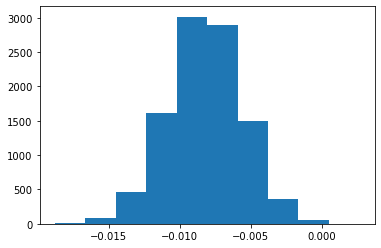

In [28]:
#for loop to do the reapeat
p_diff_7=[]
for _ in range(10000):
    gate_30_choice_7=np.random.choice([0,1],p=[1-m_30_7,m_30_7],size=[44700])
    gate_40_choice_7=np.random.choice([0,1],p=[1-m_40_7,m_40_7],size=[45489])
    p_diff_7.append(gate_40_choice_7.mean()-gate_30_choice_7.mean())
p_diff_7=np.array(p_diff_7)

#a histogram of the **diff**.  Does this plot look like what you expected?
plt.hist(p_diff_7);

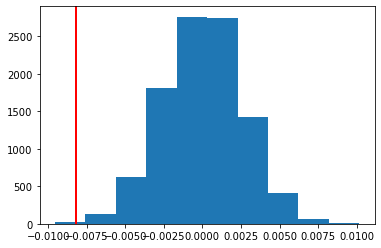

In [29]:
#will make normal shape under the null
p_null_7=np.random.normal(0,np.std(p_diff_7),10000)
plt.hist(p_null_7);
plt.axvline(diff_7,color="red",lw=2)

In [30]:
#calcualte p_value regarding alternative
(p_null_7 > p_diff_7.mean()).mean()

0.9993

c-Our p-value is  exceeds the critical value of 0.025 in this case and so we shouldn't reject the null hypothesis, so we should stick with gate_30 and not move up to gate_40.Users in Gate30 have higher 7 day retention than Gate40 fail to reject null

<h3>Conclusion

 Which level has more advantages in terms of player retention?¶
1-day and 7-day average retention are higher when the gate is at level 30 than when it is at level 40.

The bootstrap result tells us that there is strong evidence that 7-day retention is higher when the gate is at level 30 than when it is at level 40. The conclusion is: If we want to keep retention high — both 1-day and 7-day retention — we should not move the gate from level 30 to level 40.



In [31]:
df.groupby("version").retention_1.mean(), df.groupby("version").retention_7.mean()


(version
 gate_30    0.448188
 gate_40    0.442283
 Name: retention_1, dtype: float64,
 version
 gate_30    0.190201
 gate_40    0.182000
 Name: retention_7, dtype: float64)

The gate should be at level 30 but average retentions look like similar. We need more data for similarity.